**Conceitos principais no networkx**

**Graph(): grafo não direcionado**

**DiGraph(): grafo direcionado**

**MultiGraph() / MultiDiGraph(): grafos com múltiplas arestas entre nós**

**add_node(), add_edge(): adiciona nós e arestas**

**draw(): visualização básica**

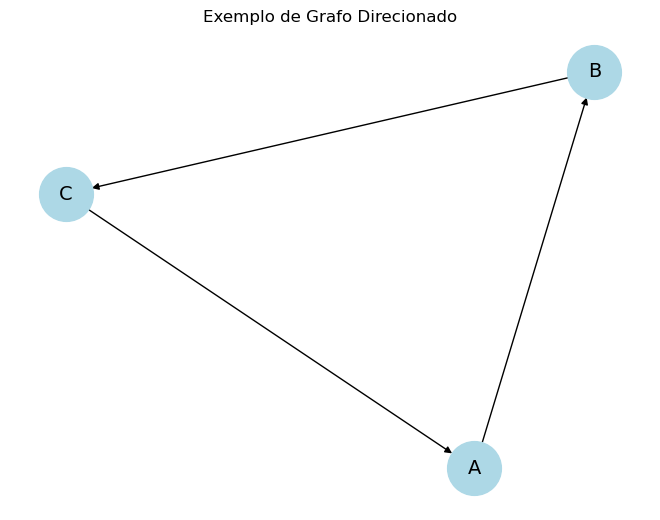

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

# Criar um grafo direcionado
G = nx.DiGraph()

# Adicionar nós
G.add_node("A")
G.add_node("B")
G.add_node("C")

# Adicionar arestas (com direção)
G.add_edge("A", "B")
G.add_edge("B", "C")
G.add_edge("C", "A")

# Visualizar
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1500, font_size=14, arrows=True)
plt.title("Exemplo de Grafo Direcionado")
plt.show()


**Objetivo: praticar a construção de grafos direcionados**
**Tarefa:**
**Adicione os nós "D" e "E" ao grafo. Depois, conecte os seguintes pares com arestas direcionadas: ("C", "D"), ("D", "E") e ("E", "A"). Visualize o novo grafo com nx.draw().**

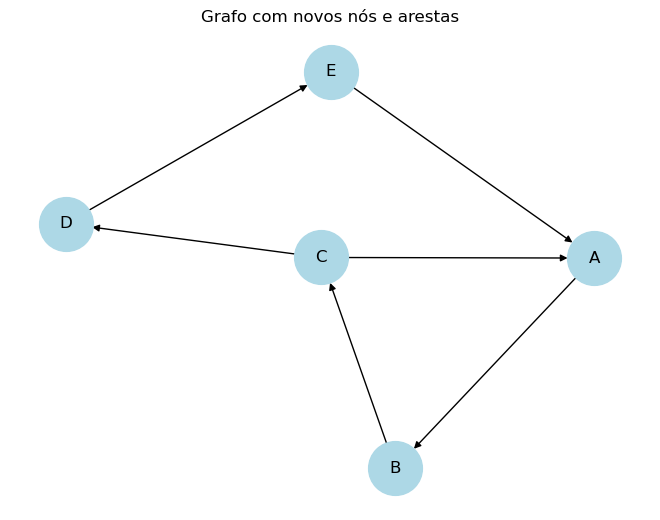

In [13]:
# Criar grafo direcionado
G = nx.DiGraph()

# Adicionar nós existentes
G.add_nodes_from(["A", "B", "C"])
G.add_edges_from([("A", "B"), ("B", "C"), ("C", "A")])

# Adicionar novos nós e arestas
G.add_nodes_from(["D", "E"])
G.add_edges_from([("C", "D"), ("D", "E"), ("E", "A")])

# Visualizar
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1500, arrows=True)
plt.title("Grafo com novos nós e arestas")
plt.show()



**Tarefa:**
**Remova o nó "C" do grafo. Depois, visualize o novo grafo. O que mudou?**

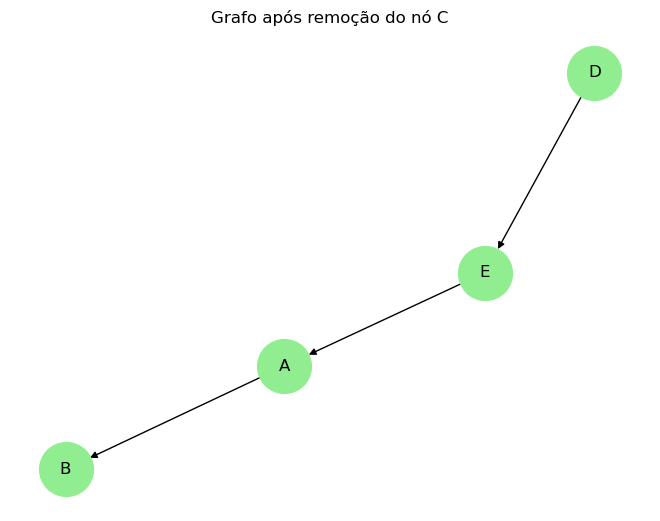

In [19]:
G.remove_node("C")

# Visualizar grafo após remoção
nx.draw(G, with_labels=True, node_color='lightgreen', node_size=1500, arrows=True)
plt.title("Grafo após remoção do nó C")
plt.show()


In [24]:
# 📘 ATIVIDADE: Explorando Métricas Visuais em Grafos com NetworkX

# Nesta atividade, vamos:
# 1. Construir um grafo direcionado
# 2. Calcular e visualizar diferentes métricas de grafos
# 3. Interpretar os resultados com base nas visualizações


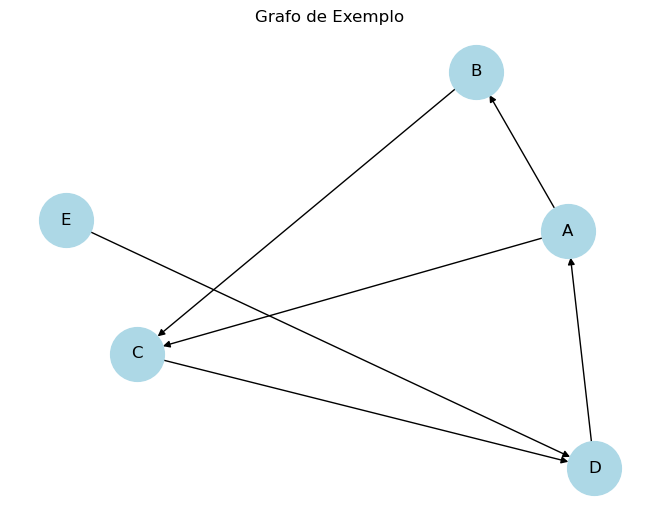

In [26]:
# ============================
# 1. Criar um grafo direcionado
# ============================

G = nx.DiGraph()
G.add_edges_from([
    ("A", "B"), ("A", "C"), 
    ("B", "C"), ("C", "D"), 
    ("D", "A"), ("E", "D")
])

# Visualização inicial do grafo
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1500, arrows=True)
plt.title("Grafo de Exemplo")
plt.show()

In [28]:
# ============================
# 2. Grau de Entrada e Saída
# ============================

# Mostra o número de conexões que entram e saem de cada nó
for node in G.nodes():
    print(f"Nó {node}: entrada = {G.in_degree(node)}, saída = {G.out_degree(node)}")

# 🔍 O que observar: nós com muitas conexões de entrada ou saída.
# Ex: o nó "C" recebe arestas de A e B.

Nó A: entrada = 1, saída = 2
Nó B: entrada = 1, saída = 1
Nó C: entrada = 2, saída = 1
Nó D: entrada = 2, saída = 1
Nó E: entrada = 0, saída = 1


In [32]:
# ========================================
# Caminho mais curto entre dois nós
# ========================================

# Exemplo: encontrar o menor caminho entre E e C
caminho = nx.shortest_path(G, source="E", target="C")
print("Caminho mais curto de E para C:", caminho)


Caminho mais curto de E para C: ['E', 'D', 'A', 'C']


In [34]:
# ========================================
# Centralidade de Intermediação
# ========================================

# Mede quantas vezes um nó aparece nos caminhos mais curtos entre outros pares de nós
centralidade = nx.betweenness_centrality(G)
print("Centralidade de intermediação:")
for n, c in centralidade.items():
    print(f"{n}: {c:.2f}")

Centralidade de intermediação:
A: 0.42
B: 0.00
C: 0.25
D: 0.50
E: 0.00


In [36]:
# Mede quão conectado está o grafo em relação ao número máximo de conexões possíveis
densidade = nx.density(G)
print("Densidade do grafo:", round(densidade, 2))

# Valor entre 0 e 1: quanto mais próximo de 1, mais conexões o grafo tem


Densidade do grafo: 0.3


In [40]:
# CREATE (c:Cliente {nome: "João"})
# CREATE (p:Produto {nome: "Caneta"})
# CREATE (c)-[:COMPRA]->(p)

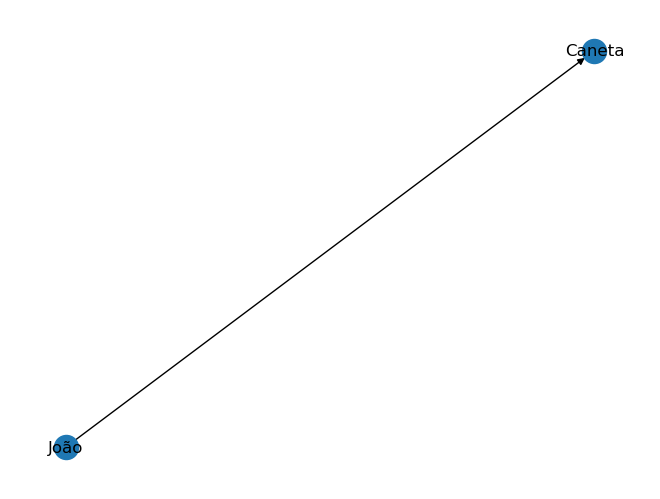

In [44]:
import networkx as nx

G = nx.DiGraph()

G.add_node("João", tipo="Cliente")
G.add_node("Caneta", tipo="Produto")
G.add_edge("João", "Caneta", tipo="COMPRA")

nx.draw(G, with_labels=True)



In [3]:
# Abrir o arquivo .cql enviado pelo usuário
cql_path = "papelaria.cql"
with open(cql_path, "r", encoding="utf-8") as file:
    cql_content = file.read()

# Visualizar um trecho do conteúdo para identificar os comandos CREATE
lines = cql_content.splitlines()
lines[:20]  # Mostrar as primeiras 20 linhas para revisão inicial



["CREATE (papel:Produto {id:1, produto:'papel A4', descricao:'Pacote papel A4 500 fls'})",
 "CREATE (cola:Produto {id:2, produto:'cola bastão', descricao:'Cola bastão grande'})",
 "CREATE (tesoura:Produto {id:3, produto:'tesoura sem ponta', descricao:'Tesoura escolar sem ponta'})",
 "CREATE (lapiseira:Produto {id:4, produto:'lapiseira 0.7', descricao:'Lapiseira para grafite 0.7'})",
 "CREATE (cartolina:Produto {id:5, produto:'cartolina branca', descricao:'Cartolina branca comum'})",
 "CREATE (alcool:Produto {id:6, produto:'alcool comum', descricao:'Álcool comum de limpeza'})",
 "CREATE (regua:Produto {id:7, produto:'regua 30 cm', descricao:'Régua escolar comum 30 cm'})",
 "CREATE (reguaGrande:Produto {id:8, produto:'Regua 50 cm', descricao:'Régua escolar comum 50 cm'})",
 "CREATE (canson:Produto {id:9, produto:'papel canson', descricao:'Papel canson branco liso'})",
 "CREATE (adesivo:Produto {id:10, produto:'bloco de adesivo', descricao:'Bloco de adesivo tipo Post-It diversas cores'})"

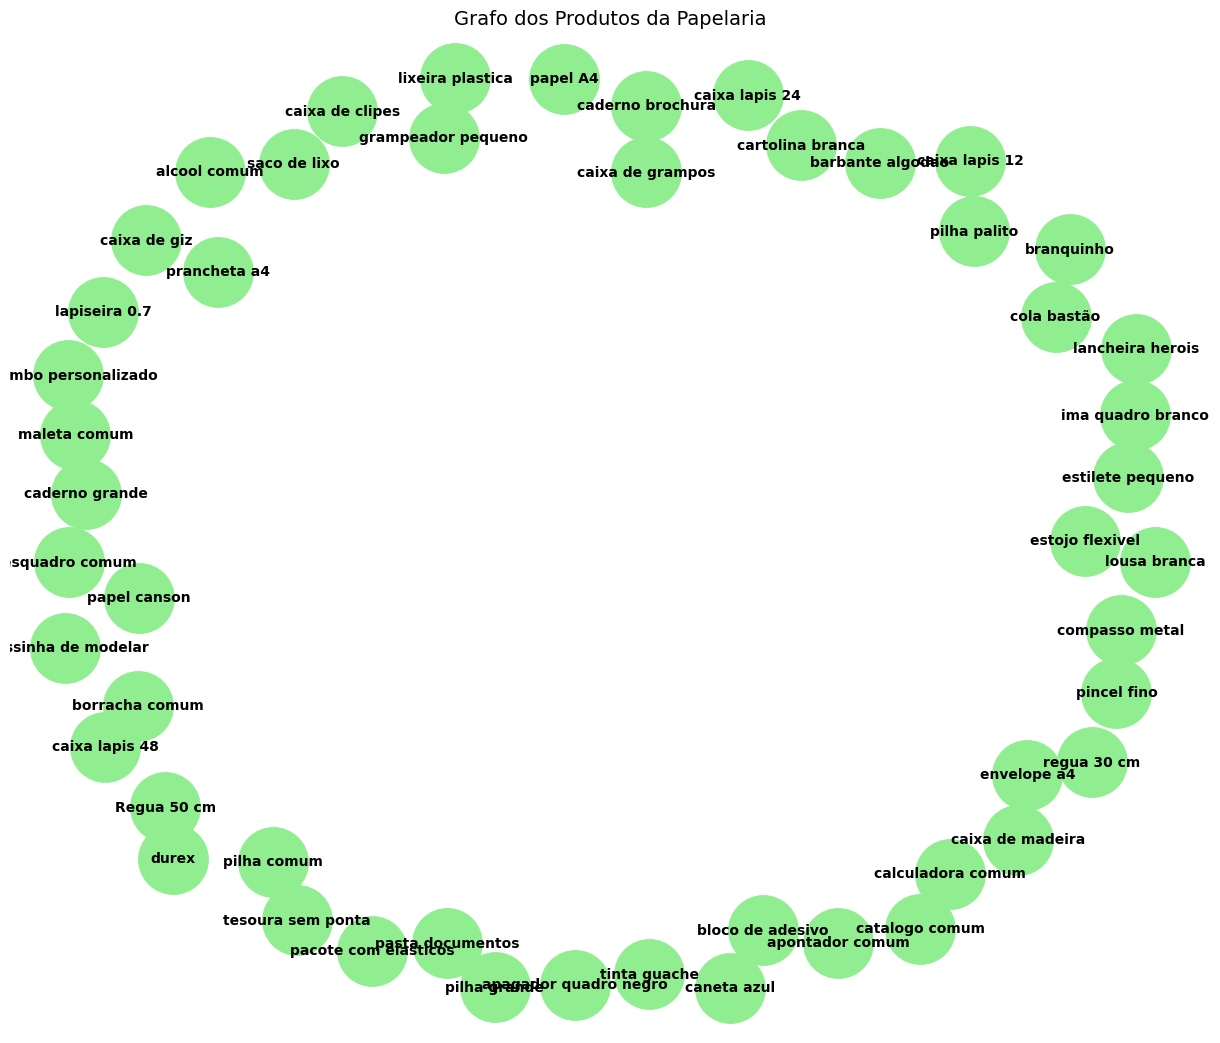

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import re

# Caminho para o arquivo .cql
cql_path = "papelaria.cql"

# Ler o conteúdo do arquivo
with open(cql_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# Criar o grafo direcionado
G = nx.DiGraph()

# Expressão regular para encontrar os produtos
produto_pattern = re.compile(r"CREATE \((\w+):Produto \{id:(\d+), produto:'(.*?)', descricao:'(.*?)'\}\)")

# Adicionar nós do tipo Produto
for line in lines:
    match = produto_pattern.match(line.strip())
    if match:
        var, id_, nome, descricao = match.groups()
        G.add_node(nome, tipo="Produto", id=int(id_), descricao=descricao)

# Visualizar o grafo
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(
    G,
    pos,
    with_labels=True,
    node_color='lightgreen',
    node_size=2500,
    font_size=10,
    font_weight='bold',
    edge_color='gray'
)
plt.title("Grafo dos Produtos da Papelaria", fontsize=14)
plt.axis('off')
plt.show()
